In [2]:
import pandas as pd
import numpy as np

# Loading Dataset
To load the dataset, we can use the `read_csv()` function from the pandas library :

```
python
df_part1 = pd.read_csv('./Sleep_health_and_lifestyle_dataset.csv')
df_part2 = pd.read_csv('./Sleep_health_and_lifestyle_dataset_part_2.csv')
```
These two lines of code will load the dataset from the CSV files `Sleep_health_and_lifestyle_dataset.csv` and `Sleep_health_and_lifestyle_dataset_part_2.csv` respectively and store them in the variables `df_part1` and `df_part2`.


In [50]:
df_part1 = pd.read_csv('./Sleep_health_and_lifestyle_dataset.csv')
df_part2 = pd.read_csv('./Sleep_health_and_lifestyle_dataset_part_2.csv')

# Merging two parts of the dataset to create a single one

In [53]:
df = pd.concat((df_part1, df_part2))
print(df.shape)
df.head()

(560, 13)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Exploring the data set

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 0 to 185
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                560 non-null    int64  
 1   Gender                   560 non-null    object 
 2   Age                      560 non-null    int64  
 3   Occupation               560 non-null    object 
 4   Sleep Duration           560 non-null    float64
 5   Quality of Sleep         560 non-null    int64  
 6   Physical Activity Level  560 non-null    int64  
 7   Stress Level             560 non-null    int64  
 8   BMI Category             560 non-null    object 
 9   Blood Pressure           560 non-null    object 
 10  Heart Rate               560 non-null    int64  
 11  Daily Steps              560 non-null    int64  
 12  Sleep Disorder           185 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 61.2+ KB


In [56]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,280.167857,40.021429,7.115893,7.275000,58.787500,5.458929,70.178571,6821.071429
std,161.418024,8.132153,0.742655,1.134631,19.955394,1.676447,3.873247,1527.465518
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,140.750000,33.000000,6.500000,6.000000,45.000000,4.000000,68.000000,5500.000000
50%,280.500000,38.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,419.250000,44.000000,7.700000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,559.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# Handling NA values  

In [22]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

In [49]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
LowBP                      0
HighBP                     0
dtype: int64

In [24]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,555,Female,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia
182,556,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
183,557,Female,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia
184,558,Male,43,Salesperson,6.4,6,45,7,Overweight,130/85,72,6000,Insomnia


In [25]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [26]:
lowRow = []
highRow = []


for val in df['Blood Pressure']:
    sp = val.split('/')

    highRow.append(int(sp[0]))
    lowRow.append(int(sp[1]))

df['LowBP'] = np.array(lowRow)
df['HighBP'] = np.array(highRow)

# df.drop('Blood Pressure', axis = 1)

In [27]:
df1 = df.drop('Blood Pressure', axis = 1)

In [28]:
df2 = df1.copy()
df2

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,LowBP,HighBP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,83,126
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,80,125
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,80,125
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,90,140
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,90,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,555,Female,43,Teacher,6.7,7,45,4,Overweight,65,6000,Insomnia,90,135
182,556,Male,43,Salesperson,6.5,6,45,7,Overweight,72,6000,Insomnia,85,130
183,557,Female,43,Teacher,6.7,7,45,4,Overweight,65,6000,Insomnia,90,135
184,558,Male,43,Salesperson,6.4,6,45,7,Overweight,72,6000,Insomnia,85,130


array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [29]:
catData = [key for key in df1 if (df1[key].dtype == object) and (key != 'Sleep Disorder')]
catData

['Gender', 'Occupation', 'BMI Category']

In [46]:
label_encoding_dict = {}
for category in catData:
    labelEncoder = LabelEncoder()
    labelEncoder.fit(df[category])
    df2[category] = labelEncoder.transform(df[category])
    label_encoding_dict[category] = labelEncoder
df2

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,LowBP,HighBP
0,1,1,27,9,6.1,6,42,6,3,77,4200,None,83,126
1,2,1,28,1,6.2,6,60,8,0,75,10000,None,80,125
2,3,1,28,1,6.2,6,60,8,0,75,10000,None,80,125
3,4,1,28,6,5.9,4,30,8,2,85,3000,Sleep Apnea,90,140
4,5,1,28,6,5.9,4,30,8,2,85,3000,Sleep Apnea,90,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,555,0,43,10,6.7,7,45,4,3,65,6000,Insomnia,90,135
182,556,1,43,7,6.5,6,45,7,3,72,6000,Insomnia,85,130
183,557,0,43,10,6.7,7,45,4,3,65,6000,Insomnia,90,135
184,558,1,43,7,6.4,6,45,7,3,72,6000,Insomnia,85,130


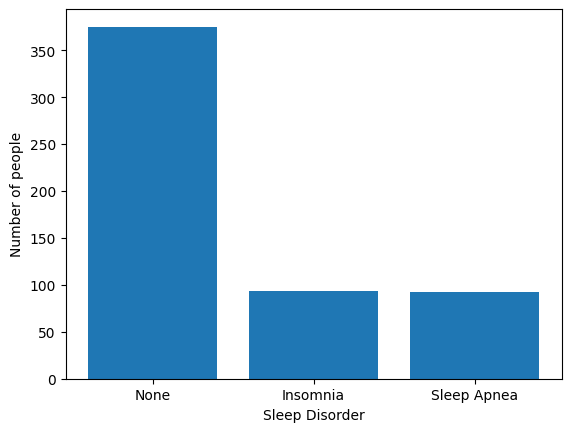

In [69]:
import matplotlib.pyplot as plt
count=df2['Sleep Disorder'].value_counts()
plt.bar(count.keys(),count)
plt.xlabel('Sleep Disorder')
plt.ylabel('Number of people')
plt.show()